#git clone

In [1]:
!git clone https://github.com/shinmura0/GPflow-Slim
%cd GPflow-Slim
!python setup.py develop
%cd /content
!git clone https://github.com/shinmura0/Neural-Kernel-Network
%cd /content/Neural-Kernel-Network

Cloning into 'GPflow-Slim'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 199 (delta 24), reused 12 (delta 5), pack-reused 156
Receiving objects: 100% (199/199), 142.10 KiB | 903.00 KiB/s, done.
Resolving deltas: 100% (108/108), done.
/content/GPflow-Slim
running develop
running egg_info
creating gpflowSlim.egg-info
writing gpflowSlim.egg-info/PKG-INFO
writing dependency_links to gpflowSlim.egg-info/dependency_links.txt
writing requirements to gpflowSlim.egg-info/requires.txt
writing top-level names to gpflowSlim.egg-info/top_level.txt
writing manifest file 'gpflowSlim.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'gpflowSlim.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.6/dist-packages/gpflowSlim.egg-link (link to .)
Adding gpflowSlim 1.0.0 to easy-install.pth file

Installed /content/GPflow-Slim
Processing dependencies

#Learn and evaluate

In [2]:
!python exp/texture.py --data test_1 --kern nkn

W0819 04:45:29.952543 139743396501376 deprecation_wrapper.py:119] From /content/GPflow-Slim/gpflowSlim/misc.py:24: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.


h: 1 / 4 , w: 1 / 4
W0819 04:45:34.633659 139743396501376 deprecation_wrapper.py:119] From /content/Neural-Kernel-Network/kernels.py:52: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0819 04:45:34.639865 139743396501376 deprecation_wrapper.py:119] From /content/GPflow-Slim/gpflowSlim/params.py:143: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0819 04:45:35.548533 139743396501376 deprecation_wrapper.py:119] From /content/GPflow-Slim/gpflowSlim/models/kgpr.py:67: The name tf.self_adjoint_eig is deprecated. Please use tf.linalg.eigh instead.

W0819 04:45:35.568010 139743396501376 deprecation_wrapper.py:119] From /content/GPflow-Slim/gpflowSlim/models/kgpr.py:74: The name tf.log is deprecated. Please use tf.m

#Heat map

/content/Neural-Kernel-Network/results/texture/test_1/nkn
/content/Neural-Kernel-Network/data/DATA


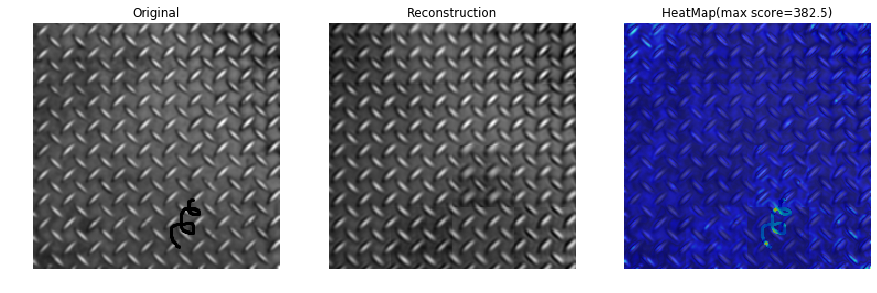

In [5]:
from keras.preprocessing.image import array_to_img, img_to_array
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Height = 224
Width = 224
channel = 3

def plot3_1(x, x_predict):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.axis("off")
    plt.imshow(x)
    
    plt.subplot(1, 3, 2)
    plt.title("Reconstruction")
    plt.axis("off")
    x_predict = np.array(x_predict).reshape((Height, Width, channel))
    plt.imshow(x_predict)

    plt.subplot(1, 3, 3)
    map_ = np.abs(x-x_predict).reshape((Height, Width, channel))
    jet = cv2.applyColorMap(np.uint8(255 * map_), cv2.COLORMAP_JET)  # 疑似的に色をつける
    jet = cv2.cvtColor(jet, cv2.COLOR_BGR2RGB)  # 色をRGBに変換
    jet = (np.float32(jet) + x*255 / 2)   # もとの画像に合成
    plt.imshow(array_to_img(jet))
    plt.title("HeatMap(max score={0})".format(np.max(np.array(jet))))
    plt.axis("off")

    plt.show()

%cd /content/Neural-Kernel-Network/results/texture/test_1/nkn

#画像の読み込み
im = Image.open("result.png")
im = img_to_array(im)

%cd /content/Neural-Kernel-Network/data/DATA

#画像の読み込み
original = Image.open("test_1.png")
original = img_to_array(original)

plot3_1(original[:,:,:3]/255, im[:,:,:3]/255)